In [141]:
#import
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

 # 사진 가져오기


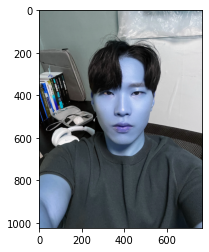

In [142]:
my_image_path = os.path.expanduser('~/aiffel/camera_sticker/images/image1.png') #os.path.expanduser() 함수를 사용하여 ~를 홈 디렉토리 경로로 변환
img_bgr = cv2.imread(my_image_path)    # OpenCV
img_show = img_bgr.copy()      #이미지카피

plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력

# 박스 영역

In [143]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

In [144]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #bgr 이미지를 rgb로 변환
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(260, 320) (527, 587)]]


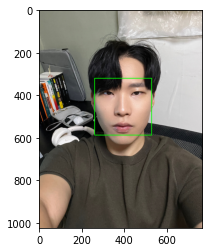

In [145]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 랜드마크 검출

In [146]:
model_path = '~/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
model_path = os.path.expanduser(model_path) #os.path.expanduser() 함수를 사용하여 ~를 홈 디렉토리 경로로 변환
landmark_predictor = dlib.shape_predictor(model_path)

In [147]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
print(len(list_landmarks[0]))

68


In [148]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] - dlib_rect.height()//2 # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() #얼굴가로역영
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(391, 475)
(x,y) : (391,341)
(w,h) : (268,268)


### 이미지 불러오기

In [149]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(268, 268, 3)


In [150]:
img_sticker[0][1]

array([255, 255, 255], dtype=uint8)

In [151]:
#사작좌표를 코 위치 - (사진의 x,y 길이의 /2)로 함 
start_y = landmark[30][1]-img_sticker.shape[0]//2
end_y = landmark[30][1]+img_sticker.shape[0]-img_sticker.shape[0]//2


sticker_area = img_show[landmark[30][1]-img_sticker.shape[1]//2:landmark[30][1]+img_sticker.shape[0]-img_sticker.shape[0]//2, landmark[30][0]-img_sticker.shape[0]//2:landmark[30][0]+img_sticker.shape[1]-img_sticker.shape[0]//2]

img_show[landmark[30][1]-img_sticker.shape[1]//2:landmark[30][1]+img_sticker.shape[0]-img_sticker.shape[0]//2, landmark[30][0]-img_sticker.shape[0]//2:landmark[30][0]+img_sticker.shape[1]-img_sticker.shape[0]//2] =\
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

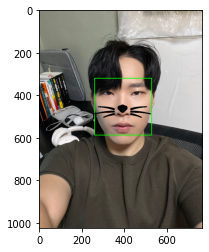

In [152]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
 [landmark[30][1]-img_sticker.shape[1]//2:landmark[30][1]+img_sticker.shape[0]-img_sticker.shape[0]//2, landmark[30][0]-img_sticker.shape[0]//2:landmark[30][0]+img_sticker.shape[1]-img_sticker.shape[0]//2